In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import MultinomialNB


In [10]:
dt = pd.read_csv('/content/SMSSpamCollection', sep = '\t', names=['label','mail'])

In [11]:
dt.head()

,label,mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


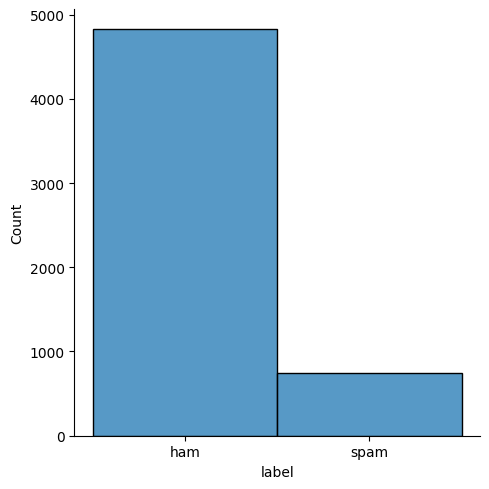

In [14]:
sns.displot(data=dt, x ='label')

In [16]:
cv = CountVectorizer()
le = LabelEncoder()

In [20]:
x = cv.fit_transform(dt['mail'])
xarray = x.toarray()

In [18]:
y = le.fit_transform(dt['label'])

In [21]:
x_tr, x_te, y_tr, y_te = train_test_split(xarray, y)

In [22]:
nb = MultinomialNB()
nb.fit(x_tr, y_tr)

MultinomialNB()

In [23]:
predict_train = nb.predict(x_tr)

In [26]:
confusion_matrix(y_tr,predict_train)

array([[3600,    8],
       [  18,  553]])

In [25]:
accuracy_score(y_tr,predict_train)

0.9937784158889686

In [24]:
predict_test = nb.predict(x_te)

In [29]:
confusion_matrix(y_te,predict_test)

array([[1199,   18],
       [  13,  163]])

In [30]:
accuracy_score(y_te,predict_test)

0.9777458722182341

In [34]:
def SpamOrHam():
  msg = []
  text = input("SMS:")
  msg.append(text)
  msg = cv.transform(msg)
  msg.toarray()
  userpredict = nb.predict(msg)

  if userpredict == 1:
    print("ham")
  else:
    print("spam")

In [35]:
SpamOrHam()

SMS:win lottery!! don't miss the chance
spam


In [36]:
folds = KFold(n_splits = 5)

In [38]:
scores = cross_val_score(nb,xarray, y,cv = folds)

In [39]:
scores

array([0.98026906, 0.98026906, 0.97845601, 0.98025135, 0.97935368])